In [1]:
import pandas as pd

df = pd.read_csv('data/재해.csv', encoding='utf-8-sig')

In [2]:


import rhinoMorph
rn = rhinoMorph.startRhino()

#stop_words = "은 이 것 등 더 를 좀 즉 인 옹 때 만 원 이때 개 일 기 시 럭 갤 성 삼 스 폰 트 드 기 이 리 폴 사 전 마 자 플 블 가 해주시 때 임"
stop_words= "은 이 것 등 더 를 좀 즉 인 옹 때 만 원 이때 개 일 기 시 럭 갤 성 삼 스 폰 트 드 기 이 리 폴 사 전 마 자 플 블 가 해주시 때 임 하 있 되 않 었 사람 지 보 때 같 년 대하 주 말 일 위하 때문 말하 가 받 그렇 알 하 경우 가요"
stop_words = stop_words.split(' ')
stop_words[0:10]

filepath:  C:\Users\admin\AppData\Local\conda\conda\envs\kyu3.7\lib\site-packages
classpath:  C:\Users\admin\AppData\Local\conda\conda\envs\kyu3.7\lib\site-packages\rhinoMorph/lib/rhino.jar
RHINO started!


['은', '이', '것', '등', '더', '를', '좀', '즉', '인', '옹']

In [3]:
df

,Unnamed: 0,URL 주소,댓글작성자명,댓글작성일자,댓글 내용
0,0,https://www.youtube.com//watch?v=NnxhEHzABus,Young,3년 전,나무가 산사태방지에 도움된다는말은 ㄹㅇ이엿다
1,1,https://www.youtube.com//watch?v=NnxhEHzABus,in tae,3년 전,3:21 답답이들.. 차를 주차해놓고 사진찍고 지럴이여 뒤늦게 심각성느...
2,2,https://www.youtube.com//watch?v=NnxhEHzABus,$,3년 전,1:05 이상황에 멋지냐;;
3,3,https://www.youtube.com//watch?v=NnxhEHzABus,천승우,3년 전,첫번째 보면 나무없는부분은 다쓸려가고 있는부분은 움찔만하네요 나무 그만베고 자연을사...
4,4,https://www.youtube.com//watch?v=NnxhEHzABus,구독하면 로또1등,3년 전,3:50 인절미들이 떠내려온닷
...,...,...,...,...,...
1459,1459,https://www.youtube.com//watch?v=xyt6VvvcSX8,전예지,2년 전,너무 좋다 ...
1460,1460,https://www.youtube.com//watch?v=xyt6VvvcSX8,캬호잇,10개월 전,와 이거 삭제되서 너무 아쉬웠는데 감사합니다..
1461,1461,https://www.youtube.com//watch?v=xyt6VvvcSX8,김유진,10개월 전,진짜 천재라고..
1462,1462,https://www.youtube.com//watch?v=IH8IkS9fKuk,Sue Park,3개월 전,목욜 하시는 생방은 안하시나요?


In [4]:
import re
answer_sentences = []
for post in df['댓글 내용']:
    answer_sentences.extend(re.split('; |\.|\?|\!', post))
#title_sentences[0:100]


answer_sentences_nouns = []

for senten in answer_sentences:
    morphed_data_sentences = [noun_answer for noun_answer in rhinoMorph.onlyMorph_list(rn, senten, pos=['NNG', 'NNP'],combineN=True) if noun_answer not in stop_words]
    answer_sentences_nouns.append(morphed_data_sentences)
#sentences_nouns


answer_sentences_nouns_result = []

for i in answer_sentences_nouns:
    senten_list=[]
    for j in i:
        if len(j)== 1:
            continue
        senten_list.append(j)
    answer_sentences_nouns_result.append(senten_list)
#sentences_nouns_result

answer_result = []

for i in answer_sentences_nouns_result:
    if len(i) ==0:
        continue
    i = " ".join(i)
    answer_result.append(i)

#title_result

answer_result= ",".join(answer_result)
answer_result = answer_result.replace(","," ")
#title_result

final_answer = answer_result.split(" ")
#final_title

from collections import Counter

wordInfo_answer = Counter(final_answer)
#wordInfo_title

answer_top50 = dict(wordInfo_answer.most_common(50))
answer_top50

{'영상': 91,
 '롱티비': 62,
 '중국': 58,
 '자연재해': 56,
 '지구': 53,
 '물고기': 47,
 '인간': 45,
 '예수': 37,
 '일본': 36,
 '학습': 35,
 '자연': 34,
 '쓰나미': 34,
 '지진': 33,
 '댓글': 29,
 '홍수': 27,
 '생각': 27,
 '죽음': 25,
 '하나님': 24,
 '우리나라': 24,
 '오늘': 23,
 '디바제시카': 23,
 '마음': 22,
 '유튜브': 22,
 '마지막': 21,
 '태풍': 20,
 '토네이도': 20,
 '사과티비': 19,
 '목소리': 18,
 '중공': 18,
 '단지': 18,
 '처음': 17,
 '그리스도': 16,
 '재난': 16,
 '코로나': 15,
 '걱정': 14,
 '한국': 14,
 '파도': 13,
 '요즘': 13,
 '온라인': 13,
 '아들': 13,
 '기회': 13,
 '지금': 13,
 '상황': 12,
 '정도': 12,
 '말씀': 12,
 '영화': 12,
 '공산당': 12,
 '스님': 12,
 '나무': 11,
 '번개': 11}

In [5]:
answer_top30 = dict(wordInfo_answer.most_common(30))
answer_top30

{'영상': 91,
 '롱티비': 62,
 '중국': 58,
 '자연재해': 56,
 '지구': 53,
 '물고기': 47,
 '인간': 45,
 '예수': 37,
 '일본': 36,
 '학습': 35,
 '자연': 34,
 '쓰나미': 34,
 '지진': 33,
 '댓글': 29,
 '홍수': 27,
 '생각': 27,
 '죽음': 25,
 '하나님': 24,
 '우리나라': 24,
 '오늘': 23,
 '디바제시카': 23,
 '마음': 22,
 '유튜브': 22,
 '마지막': 21,
 '태풍': 20,
 '토네이도': 20,
 '사과티비': 19,
 '목소리': 18,
 '중공': 18,
 '단지': 18}

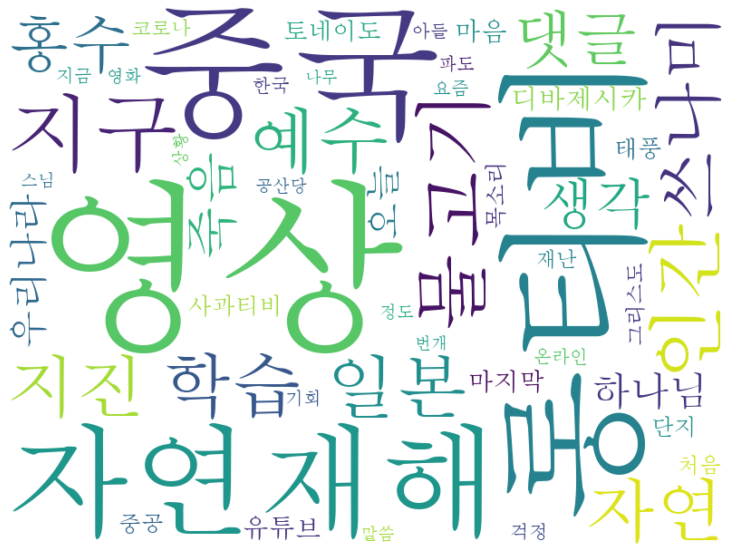

In [6]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
cloud = WordCloud(font_path='C:/windows/fonts/batang.ttc', width=800, height=600,background_color='white').generate_from_frequencies(answer_top50)
plt.figure(figsize=(30,10))
plt.imshow(cloud, interpolation='bilinear')  # 글자를 더 부드럽게 나오게 한다
plt.axis('off')                              # X축과 Y축의 위치 정보 off
plt.show()

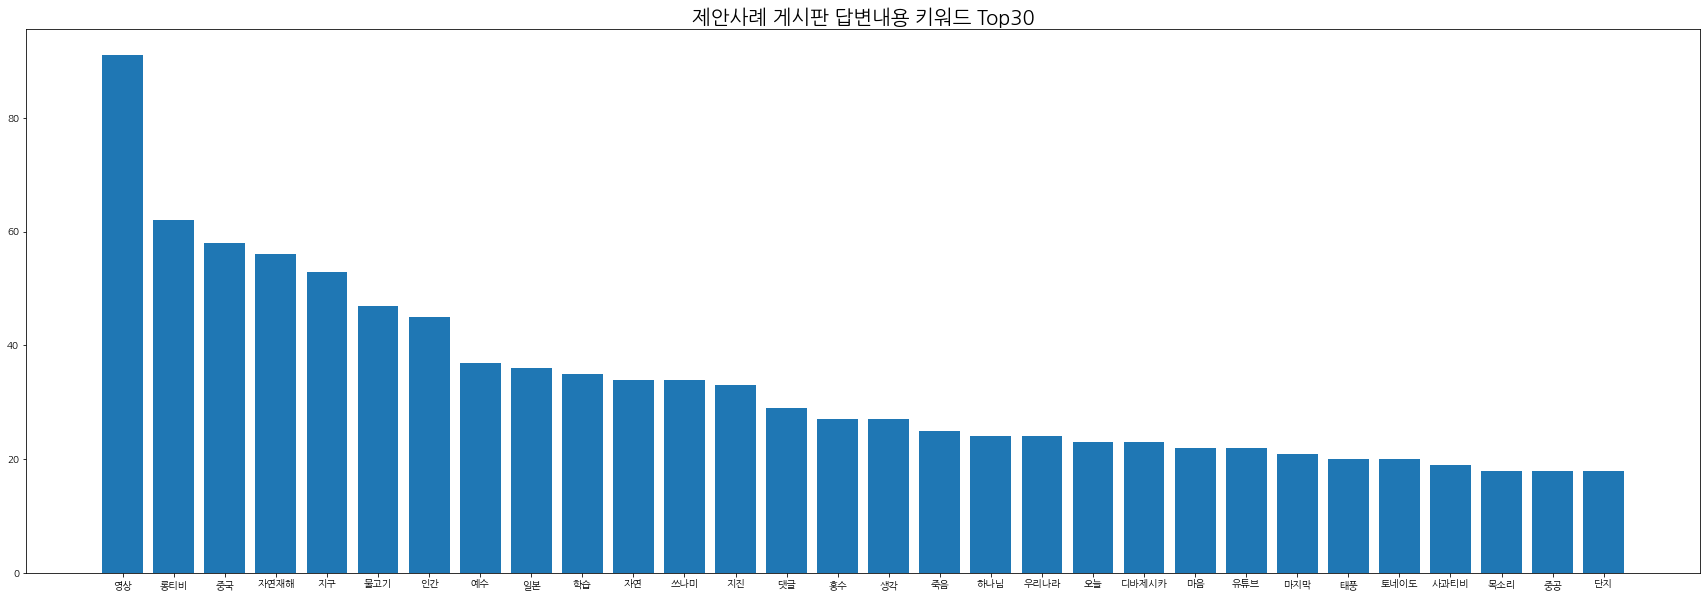

In [7]:
import matplotlib.pyplot as plt
import matplotlib
import matplotlib.font_manager as fm
fm.get_fontconfig_fonts()
# font_location = '/usr/share/fonts/truetype/nanum/NanumGothicOTF.ttf'
font_location = 'C:/Windows/Fonts/NanumGothic.ttf' # For Windows
font_name = fm.FontProperties(fname=font_location).get_name()
matplotlib.rc('font', family=font_name)

top_title_keys=[i for i in answer_top50.keys()]
top_title_values=[i for i in answer_top50.values()]

plt.figure(figsize= (30,10))
plt.title("제안사례 게시판 답변내용 키워드 Top30", fontsize=20)
plt.bar(list(top_title_keys[:30]), list(top_title_values[:30]))
plt.show()

In [8]:
#content_top_100 

answer_top50_word2id = {w: i for i, w in enumerate(answer_top50.keys())}
answer_top50_word2id

{'영상': 0,
 '롱티비': 1,
 '중국': 2,
 '자연재해': 3,
 '지구': 4,
 '물고기': 5,
 '인간': 6,
 '예수': 7,
 '일본': 8,
 '학습': 9,
 '자연': 10,
 '쓰나미': 11,
 '지진': 12,
 '댓글': 13,
 '홍수': 14,
 '생각': 15,
 '죽음': 16,
 '하나님': 17,
 '우리나라': 18,
 '오늘': 19,
 '디바제시카': 20,
 '마음': 21,
 '유튜브': 22,
 '마지막': 23,
 '태풍': 24,
 '토네이도': 25,
 '사과티비': 26,
 '목소리': 27,
 '중공': 28,
 '단지': 29,
 '처음': 30,
 '그리스도': 31,
 '재난': 32,
 '코로나': 33,
 '걱정': 34,
 '한국': 35,
 '파도': 36,
 '요즘': 37,
 '온라인': 38,
 '아들': 39,
 '기회': 40,
 '지금': 41,
 '상황': 42,
 '정도': 43,
 '말씀': 44,
 '영화': 45,
 '공산당': 46,
 '스님': 47,
 '나무': 48,
 '번개': 49}

In [9]:
#content_top_100 

answer_top30_word2id = {w: i for i, w in enumerate(answer_top30.keys())}
answer_top30_word2id

{'영상': 0,
 '롱티비': 1,
 '중국': 2,
 '자연재해': 3,
 '지구': 4,
 '물고기': 5,
 '인간': 6,
 '예수': 7,
 '일본': 8,
 '학습': 9,
 '자연': 10,
 '쓰나미': 11,
 '지진': 12,
 '댓글': 13,
 '홍수': 14,
 '생각': 15,
 '죽음': 16,
 '하나님': 17,
 '우리나라': 18,
 '오늘': 19,
 '디바제시카': 20,
 '마음': 21,
 '유튜브': 22,
 '마지막': 23,
 '태풍': 24,
 '토네이도': 25,
 '사과티비': 26,
 '목소리': 27,
 '중공': 28,
 '단지': 29}

In [10]:

answer_top30_word2id = {w: i for i, w in enumerate(answer_top30.keys())}
answer_top30_word2id

{'영상': 0,
 '롱티비': 1,
 '중국': 2,
 '자연재해': 3,
 '지구': 4,
 '물고기': 5,
 '인간': 6,
 '예수': 7,
 '일본': 8,
 '학습': 9,
 '자연': 10,
 '쓰나미': 11,
 '지진': 12,
 '댓글': 13,
 '홍수': 14,
 '생각': 15,
 '죽음': 16,
 '하나님': 17,
 '우리나라': 18,
 '오늘': 19,
 '디바제시카': 20,
 '마음': 21,
 '유튜브': 22,
 '마지막': 23,
 '태풍': 24,
 '토네이도': 25,
 '사과티비': 26,
 '목소리': 27,
 '중공': 28,
 '단지': 29}

In [11]:
answer_top50_id2word = {i: w for i, w in enumerate(answer_top50.keys())}
answer_top50_id2word

{0: '영상',
 1: '롱티비',
 2: '중국',
 3: '자연재해',
 4: '지구',
 5: '물고기',
 6: '인간',
 7: '예수',
 8: '일본',
 9: '학습',
 10: '자연',
 11: '쓰나미',
 12: '지진',
 13: '댓글',
 14: '홍수',
 15: '생각',
 16: '죽음',
 17: '하나님',
 18: '우리나라',
 19: '오늘',
 20: '디바제시카',
 21: '마음',
 22: '유튜브',
 23: '마지막',
 24: '태풍',
 25: '토네이도',
 26: '사과티비',
 27: '목소리',
 28: '중공',
 29: '단지',
 30: '처음',
 31: '그리스도',
 32: '재난',
 33: '코로나',
 34: '걱정',
 35: '한국',
 36: '파도',
 37: '요즘',
 38: '온라인',
 39: '아들',
 40: '기회',
 41: '지금',
 42: '상황',
 43: '정도',
 44: '말씀',
 45: '영화',
 46: '공산당',
 47: '스님',
 48: '나무',
 49: '번개'}

In [12]:
answer_top30_id2word = {i: w for i, w in enumerate(answer_top30.keys())}
answer_top30_id2word

{0: '영상',
 1: '롱티비',
 2: '중국',
 3: '자연재해',
 4: '지구',
 5: '물고기',
 6: '인간',
 7: '예수',
 8: '일본',
 9: '학습',
 10: '자연',
 11: '쓰나미',
 12: '지진',
 13: '댓글',
 14: '홍수',
 15: '생각',
 16: '죽음',
 17: '하나님',
 18: '우리나라',
 19: '오늘',
 20: '디바제시카',
 21: '마음',
 22: '유튜브',
 23: '마지막',
 24: '태풍',
 25: '토네이도',
 26: '사과티비',
 27: '목소리',
 28: '중공',
 29: '단지'}

In [13]:
import numpy as np

# 50 단어 인접행렬
answer_adjacent_matrix_50 = np.zeros((50, 50), int)
for sentence in answer_sentences_nouns_result:
    for wi, i in answer_top50_word2id.items():
        if wi in sentence:
            for wj, j in answer_top50_word2id.items():
                if i != j and wj in sentence:
                    answer_adjacent_matrix_50[i][j] += 1
answer_adjacent_matrix_50

array([[0, 0, 3, ..., 1, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [3, 0, 0, ..., 0, 0, 0],
       ...,
       [1, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [14]:
answer_sentences_nouns_result

[['나무', '산사태방지', '도움'],
 [],
 [],
 ['사진', '지럴', '심각성', '거보'],
 [],
 [],
 ['이상황'],
 ['나무', '나무', '자연'],
 ['인절미'],
 ['ㅈㄴ'],
 ['감자'],
 ['이기적인'],
 [],
 ['남이', '구경하', '길가'],
 [],
 [],
 [],
 ['자연'],
 [],
 [],
 [],
 ['번개'],
 ['인절미가루'],
 [],
 ['토르', '이유'],
 ['영상', '목숨', '건진거'],
 ['살수대첩', '느낌'],
 [],
 [],
 [],
 ['슈렉'],
 [],
 [],
 ['파도', '주변', '잘못'],
 [],
 [],
 ['자연의섭리', '지구', '희생'],
 [],
 ['처음', '중간', '마지막'],
 ['상황'],
 [],
 ['피해'],
 ['도망'],
 ['여친'],
 ['사과ㅌ'],
 [],
 ['라바인뉴옥'],
 ['유리창', '청소'],
 ['진짜', '유속'],
 [],
 ['마음'],
 [],
 [],
 [],
 ['마지막', '영상', '인절미'],
 ['대박'],
 [],
 [],
 [],
 ['마지막', '현실감', 'ㅁㅊ'],
 ['마지막', '차량', '양쪽', '나무'],
 ['유튜브', '출처'],
 ['정보'],
 [],
 ['오금'],
 ['요즘', '롱티비'],
 ['유튜브', '그때'],
 [],
 [],
 ['마음'],
 [],
 [],
 ['지진', '홍수', '자연'],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 ['온라인', '학습'],
 [],
 [],
 ['반디캠'],
 [],
 [],
 [],
 [],
 [],
 [],
 ['이블밖'],
 [],
 [],
 [],
 [],
 ['영상'],
 ['마지막', '나무'],
 ['미르스틴'],
 [],
 ['걱정', '가입', '시청', '무료', '걱정'],
 ['번개'],
 [],
 [],
 [],
 [],
 ['오타'],
 [],
 

In [15]:
import numpy as np

# 50 단어 인접행렬
answer_adjacent_matrix_30 = np.zeros((30, 30), int)
for sentence in answer_sentences_nouns_result:
    for wi, i in answer_top30_word2id.items():
        if wi in sentence:
            for wj, j in answer_top30_word2id.items():
                if i != j and wj in sentence:
                    answer_adjacent_matrix_30[i][j] += 1
answer_adjacent_matrix_30

array([[ 0,  0,  3,  3,  1,  0,  1,  0,  0,  0,  1,  3,  2,  3,  1,  1,
         1,  0,  1,  3,  1,  0,  0,  4,  0,  0,  1,  1,  0,  1],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, 14,  0,  0,
         0,  0,  0,  0,  0,  0,  2,  0,  0,  0,  0,  0,  0,  0],
       [ 3,  0,  0,  1,  1,  6,  0,  0,  0,  0,  0,  2,  1,  0,  2,  1,
         1,  1,  2,  0,  0,  0,  1,  0,  0,  0,  0,  0,  1,  0],
       [ 3,  0,  1,  0,  6,  0,  7,  4,  0,  0,  2,  1,  4,  0,  1,  1,
         5,  0,  0,  0,  1,  0,  0,  0,  0,  2,  0,  1,  0,  0],
       [ 1,  0,  1,  6,  0,  0,  8,  0,  0,  0,  1,  0,  1,  0,  1,  1,
         1,  0,  0,  0,  0,  0,  0,  2,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  6,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  4,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 1,  0,  0,  7,  8,  0,  0,  1,  0,  0,  5,  0,  1,  0,  0,  0,
         1,  0,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  4,  0,  0,  1,  0,  

In [16]:
answer_adjacent_matrix_50.shape, answer_adjacent_matrix_30.shape

((50, 50), (30, 30))

In [17]:
import networkx as nx
answer_network_30 = nx.from_numpy_matrix(answer_adjacent_matrix_30)
list(answer_network_30.adjacency())

[(0,
  {2: {'weight': 3},
   3: {'weight': 3},
   4: {'weight': 1},
   6: {'weight': 1},
   10: {'weight': 1},
   11: {'weight': 3},
   12: {'weight': 2},
   13: {'weight': 3},
   14: {'weight': 1},
   15: {'weight': 1},
   16: {'weight': 1},
   18: {'weight': 1},
   19: {'weight': 3},
   20: {'weight': 1},
   23: {'weight': 4},
   26: {'weight': 1},
   27: {'weight': 1},
   29: {'weight': 1}}),
 (1, {13: {'weight': 14}, 22: {'weight': 2}}),
 (2,
  {0: {'weight': 3},
   3: {'weight': 1},
   4: {'weight': 1},
   5: {'weight': 6},
   11: {'weight': 2},
   12: {'weight': 1},
   14: {'weight': 2},
   15: {'weight': 1},
   16: {'weight': 1},
   17: {'weight': 1},
   18: {'weight': 2},
   22: {'weight': 1},
   28: {'weight': 1}}),
 (3,
  {0: {'weight': 3},
   2: {'weight': 1},
   4: {'weight': 6},
   6: {'weight': 7},
   7: {'weight': 4},
   10: {'weight': 2},
   11: {'weight': 1},
   12: {'weight': 4},
   14: {'weight': 1},
   15: {'weight': 1},
   16: {'weight': 5},
   20: {'weight': 1},
 

In [18]:
answer_network_50 = nx.from_numpy_matrix(answer_adjacent_matrix_50)
list(answer_network_50.adjacency())

[(0,
  {2: {'weight': 3},
   3: {'weight': 3},
   4: {'weight': 1},
   6: {'weight': 1},
   10: {'weight': 1},
   11: {'weight': 3},
   12: {'weight': 2},
   13: {'weight': 3},
   14: {'weight': 1},
   15: {'weight': 1},
   16: {'weight': 1},
   18: {'weight': 1},
   19: {'weight': 3},
   20: {'weight': 1},
   23: {'weight': 4},
   26: {'weight': 1},
   27: {'weight': 1},
   29: {'weight': 1},
   32: {'weight': 3},
   35: {'weight': 1},
   37: {'weight': 1},
   41: {'weight': 1},
   42: {'weight': 3},
   44: {'weight': 1},
   47: {'weight': 1}}),
 (1,
  {13: {'weight': 14},
   22: {'weight': 2},
   30: {'weight': 2},
   37: {'weight': 5},
   43: {'weight': 2}}),
 (2,
  {0: {'weight': 3},
   3: {'weight': 1},
   4: {'weight': 1},
   5: {'weight': 6},
   11: {'weight': 2},
   12: {'weight': 1},
   14: {'weight': 2},
   15: {'weight': 1},
   16: {'weight': 1},
   17: {'weight': 1},
   18: {'weight': 2},
   22: {'weight': 1},
   28: {'weight': 1},
   32: {'weight': 2},
   33: {'weight': 1}

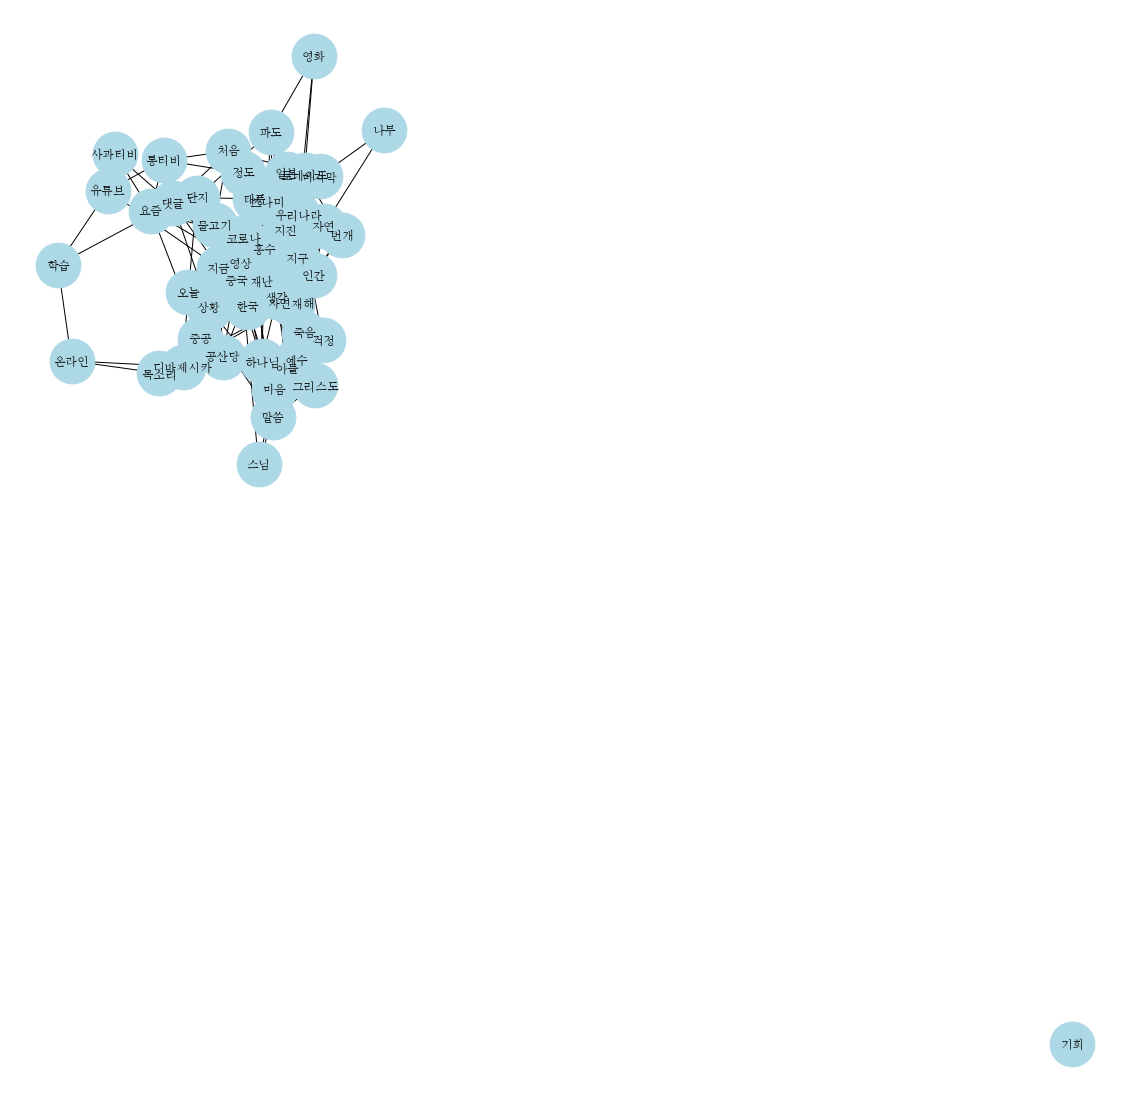

In [19]:
import matplotlib.pyplot as plt
from matplotlib import font_manager as fm
from matplotlib import rc

font_path="C:/Windows/Fonts/batang.ttc"
font_name = fm.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)

fig = plt.figure()
fig.set_size_inches(20, 20)
ax = fig.add_subplot(1, 1, 1)
ax.axis("off")
option = {
    'node_color' : 'lightblue',
    'node_size' : 2000,
    'size' : 2
}

'''
# 키워드 50개로 네트워크
'''

#G1=nx.Graph(san_network, labels=san_id2word, font_family=font_name, ax=ax)
nx.draw(answer_network_50, labels=answer_top50_id2word, font_family=font_name, ax=ax, **option)
#nx.draw(san_network, labels=san_id2word, font_family=font_name, ax=ax, **option)

#nx.write_graphml(G1, 'graphfile.graphml')
#nx.write_gexf(G1, 'sanjae_insurance.gexf')
plt.show()

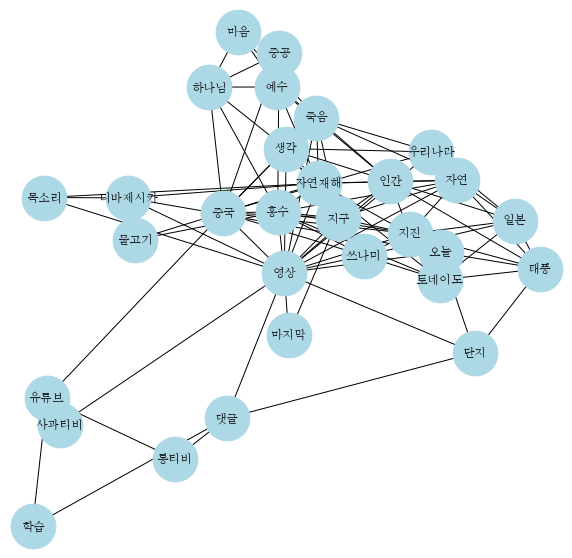

In [20]:
import matplotlib.pyplot as plt
from matplotlib import font_manager as fm
from matplotlib import rc

font_path="C:/Windows/Fonts/batang.ttc"
font_name = fm.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)

fig = plt.figure()
fig.set_size_inches(10, 10)
ax = fig.add_subplot(1, 1, 1)
ax.axis("off")
option = {
    'node_color' : 'lightblue',
    'node_size' : 2000,
    'size' : 2
}

'''
# 키워드 30개로 네트워크
'''

#G1=nx.Graph(san_network, labels=san_id2word, font_family=font_name, ax=ax)
nx.draw(answer_network_30, labels=answer_top30_id2word, font_family=font_name, ax=ax, **option)
#nx.draw(san_network, labels=san_id2word, font_family=font_name, ax=ax, **option)

#nx.write_graphml(G1, 'graphfile.graphml')
#nx.write_gexf(G1, 'sanjae_insurance.gexf')
plt.show()

# 근접중심성

In [21]:
#Closeness
nx.closeness_centrality(answer_network_50, distance='weight')

{0: 0.5283191928456775,
 1: 0.24113029827315544,
 2: 0.47020408163265304,
 3: 0.4435887562572199,
 4: 0.4655485956758941,
 5: 0.3535369034831978,
 6: 0.4394430669464047,
 7: 0.36169544740973314,
 8: 0.40534834623504573,
 9: 0.30732292917166865,
 10: 0.4394430669464047,
 11: 0.3535369034831978,
 12: 0.4161098067545602,
 13: 0.3984780352819094,
 14: 0.4847464759099516,
 15: 0.47980008329862556,
 16: 0.4655485956758941,
 17: 0.38541318166610905,
 18: 0.4435887562572199,
 19: 0.33827631772133315,
 20: 0.40887311446317653,
 21: 0.3358600583090379,
 22: 0.33347807207989577,
 23: 0.27179426683968383,
 24: 0.395129480363574,
 25: 0.3562152133580705,
 26: 0.3535369034831978,
 27: 0.37317784256559766,
 28: 0.3702394343564197,
 29: 0.3984780352819094,
 30: 0.3562152133580705,
 31: 0.174797056369016,
 32: 0.43537414965986393,
 33: 0.401883830455259,
 34: 0.3918367346938776,
 35: 0.4478134110787172,
 36: 0.3589344134600405,
 37: 0.37616326530612243,
 38: 0.3014128728414443,
 39: 0.29387755102040813

In [22]:
#Closeness
nx.closeness_centrality(answer_network_30, distance='weight')

{0: 0.48333333333333334,
 1: 0.20279720279720279,
 2: 0.4393939393939394,
 3: 0.4027777777777778,
 4: 0.4461538461538462,
 5: 0.16111111111111112,
 6: 0.3918918918918919,
 7: 0.29,
 8: 0.3493975903614458,
 9: 0.26851851851851855,
 10: 0.4084507042253521,
 11: 0.3411764705882353,
 12: 0.37662337662337664,
 13: 0.28431372549019607,
 14: 0.4264705882352941,
 15: 0.453125,
 16: 0.453125,
 17: 0.3493975903614458,
 18: 0.3972602739726027,
 19: 0.30851063829787234,
 20: 0.3717948717948718,
 21: 0.17058823529411765,
 22: 0.3333333333333333,
 23: 0.2396694214876033,
 24: 0.32222222222222224,
 25: 0.3118279569892473,
 26: 0.32954545454545453,
 27: 0.35802469135802467,
 28: 0.3411764705882353,
 29: 0.35802469135802467}

# 연결중심성

In [23]:
#Degree
nx.degree_centrality(answer_network_50)

{0: 0.5102040816326531,
 1: 0.1020408163265306,
 2: 0.4081632653061224,
 3: 0.3877551020408163,
 4: 0.24489795918367346,
 5: 0.1020408163265306,
 6: 0.22448979591836732,
 7: 0.22448979591836732,
 8: 0.18367346938775508,
 9: 0.061224489795918366,
 10: 0.22448979591836732,
 11: 0.22448979591836732,
 12: 0.3061224489795918,
 13: 0.18367346938775508,
 14: 0.3469387755102041,
 15: 0.2857142857142857,
 16: 0.2857142857142857,
 17: 0.18367346938775508,
 18: 0.18367346938775508,
 19: 0.1020408163265306,
 20: 0.14285714285714285,
 21: 0.16326530612244897,
 22: 0.08163265306122448,
 23: 0.08163265306122448,
 24: 0.2040816326530612,
 25: 0.18367346938775508,
 26: 0.061224489795918366,
 27: 0.08163265306122448,
 28: 0.12244897959183673,
 29: 0.12244897959183673,
 30: 0.14285714285714285,
 31: 0.12244897959183673,
 32: 0.24489795918367346,
 33: 0.1020408163265306,
 34: 0.16326530612244897,
 35: 0.2040816326530612,
 36: 0.1020408163265306,
 37: 0.12244897959183673,
 38: 0.061224489795918366,
 39: 0.

In [24]:
#Degree
nx.degree_centrality(answer_network_30)

{0: 0.6206896551724138,
 1: 0.06896551724137931,
 2: 0.4482758620689655,
 3: 0.48275862068965514,
 4: 0.3448275862068966,
 5: 0.06896551724137931,
 6: 0.27586206896551724,
 7: 0.1724137931034483,
 8: 0.24137931034482757,
 9: 0.06896551724137931,
 10: 0.27586206896551724,
 11: 0.27586206896551724,
 12: 0.3793103448275862,
 13: 0.13793103448275862,
 14: 0.3793103448275862,
 15: 0.3103448275862069,
 16: 0.3448275862068966,
 17: 0.20689655172413793,
 18: 0.20689655172413793,
 19: 0.13793103448275862,
 20: 0.13793103448275862,
 21: 0.10344827586206896,
 22: 0.13793103448275862,
 23: 0.06896551724137931,
 24: 0.24137931034482757,
 25: 0.20689655172413793,
 26: 0.06896551724137931,
 27: 0.10344827586206896,
 28: 0.10344827586206896,
 29: 0.13793103448275862}

# 위세중심성

In [25]:
#Eigenvector
nx.eigenvector_centrality(answer_network_50, weight='weight')

{0: 0.10957424727995219,
 1: 0.01493014008757136,
 2: 0.0911472098169776,
 3: 0.3444368653721665,
 4: 0.14042549064582333,
 5: 0.03021047437491404,
 6: 0.16235313803922666,
 7: 0.4611400873235468,
 8: 0.03619260299738291,
 9: 0.0009993518962281701,
 10: 0.07826222907052303,
 11: 0.07159520824085,
 12: 0.11243791546411214,
 13: 0.02315249765310727,
 14: 0.07562929465343096,
 15: 0.12459725251593151,
 16: 0.28898101897490946,
 17: 0.2698581038510202,
 18: 0.034595503847677685,
 19: 0.016710203904853647,
 20: 0.031622373895688796,
 21: 0.18411532157583857,
 22: 0.004634297486780967,
 23: 0.024039537711201535,
 24: 0.03164756294072058,
 25: 0.04329605946384385,
 26: 0.004536025864321722,
 27: 0.019660247565512073,
 28: 0.029884240504740582,
 29: 0.009994899001700273,
 30: 0.01695341782192037,
 31: 0.3526813292468242,
 32: 0.062533722311742,
 33: 0.012111852563141111,
 34: 0.24119802329966952,
 35: 0.042975757013416556,
 36: 0.01947784809298879,
 37: 0.008874332641787696,
 38: 0.00170654710

In [26]:
#Eigenvector
nx.eigenvector_centrality(answer_network_30, weight='weight')

{0: 0.2498681874808104,
 1: 0.042006807456551346,
 2: 0.1735771424812324,
 3: 0.46530261074225,
 4: 0.3406285772848926,
 5: 0.08164453265035333,
 6: 0.37434325761197523,
 7: 0.21719788544959095,
 8: 0.12319737421469514,
 9: 0.0036085326365353065,
 10: 0.20947047286753867,
 11: 0.20762113941727628,
 12: 0.31244164136776476,
 13: 0.06312184346282353,
 14: 0.18408096142129424,
 15: 0.1105452950782119,
 16: 0.2361925859518022,
 17: 0.13921043457798846,
 18: 0.05386990003934952,
 19: 0.04438921576906402,
 20: 0.044785879800118986,
 21: 0.10885970441344868,
 22: 0.01544566725368093,
 23: 0.07718730127921847,
 24: 0.10604438756352572,
 25: 0.11794094895348765,
 26: 0.01502213668968923,
 27: 0.04312799263435338,
 28: 0.029211716648203753,
 29: 0.033061724140440646}

# 근접중심성

In [27]:
#Current Flow Closeness
nx.current_flow_closeness_centrality(answer_network_50)

NetworkXError: Graph not connected.

In [ ]:
#Current Flow Closeness
nx.current_flow_closeness_centrality(answer_network_30)

In [ ]:
#Closeness
nx.closeness_centrality(answer_network_50, distance='weight')

In [ ]:
#Closeness
nx.closeness_centrality(answer_network_30, distance='weight')

# 매개중심성

In [ ]:
#Current Flow Betweenness
nx.current_flow_betweenness_centrality(answer_network_50)

In [ ]:
#Current Flow Betweenness
nx.current_flow_betweenness_centrality(answer_network_30)

In [ ]:
#Communicability Betweenness
nx.communicability_betweenness_centrality(answer_network_50)

In [ ]:
G1_answer_50words=nx.Graph(answer_network_50, labels=answer_top50_word2id, font_family=font_name, ax=ax)
G1_answer_50words

In [ ]:
G1_answer_30words=nx.Graph(answer_network_30, labels=answer_top30_word2id, font_family=font_name, ax=ax)
G1_answer_30words

In [ ]:
# nx.write_gexf(G1_answer_50words, '산업재해보상보험_50keyword_graph.gexf')

In [ ]:
# nx.write_gexf(G1_answer_30words, '산업재해보상보험_30keyword_graph.gexf')

In [28]:
#Degree -  ------------------------- 연결중심성
import networkx

labels = list(answer_top50_word2id.keys())
values = list(nx.degree_centrality(answer_network_50).values())

연결중심성=[]
for i, j in zip(labels,values):
    연결중심성.append((i,j))
연결중심성 = dict(연결중심성)
연결중심성

{'영상': 0.5102040816326531,
 '롱티비': 0.1020408163265306,
 '중국': 0.4081632653061224,
 '자연재해': 0.3877551020408163,
 '지구': 0.24489795918367346,
 '물고기': 0.1020408163265306,
 '인간': 0.22448979591836732,
 '예수': 0.22448979591836732,
 '일본': 0.18367346938775508,
 '학습': 0.061224489795918366,
 '자연': 0.22448979591836732,
 '쓰나미': 0.22448979591836732,
 '지진': 0.3061224489795918,
 '댓글': 0.18367346938775508,
 '홍수': 0.3469387755102041,
 '생각': 0.2857142857142857,
 '죽음': 0.2857142857142857,
 '하나님': 0.18367346938775508,
 '우리나라': 0.18367346938775508,
 '오늘': 0.1020408163265306,
 '디바제시카': 0.14285714285714285,
 '마음': 0.16326530612244897,
 '유튜브': 0.08163265306122448,
 '마지막': 0.08163265306122448,
 '태풍': 0.2040816326530612,
 '토네이도': 0.18367346938775508,
 '사과티비': 0.061224489795918366,
 '목소리': 0.08163265306122448,
 '중공': 0.12244897959183673,
 '단지': 0.12244897959183673,
 '처음': 0.14285714285714285,
 '그리스도': 0.12244897959183673,
 '재난': 0.24489795918367346,
 '코로나': 0.1020408163265306,
 '걱정': 0.16326530612244897,
 '한국': 0.

In [29]:
#Degree -  ------------------------- 연결중심성
import networkx

labels = list(answer_top30_word2id.keys())
values = list(nx.degree_centrality(answer_network_30).values())

연결중심성=[]
for i, j in zip(labels,values):
    연결중심성.append((i,j))
연결중심성 = dict(연결중심성)
연결중심성

{'영상': 0.6206896551724138,
 '롱티비': 0.06896551724137931,
 '중국': 0.4482758620689655,
 '자연재해': 0.48275862068965514,
 '지구': 0.3448275862068966,
 '물고기': 0.06896551724137931,
 '인간': 0.27586206896551724,
 '예수': 0.1724137931034483,
 '일본': 0.24137931034482757,
 '학습': 0.06896551724137931,
 '자연': 0.27586206896551724,
 '쓰나미': 0.27586206896551724,
 '지진': 0.3793103448275862,
 '댓글': 0.13793103448275862,
 '홍수': 0.3793103448275862,
 '생각': 0.3103448275862069,
 '죽음': 0.3448275862068966,
 '하나님': 0.20689655172413793,
 '우리나라': 0.20689655172413793,
 '오늘': 0.13793103448275862,
 '디바제시카': 0.13793103448275862,
 '마음': 0.10344827586206896,
 '유튜브': 0.13793103448275862,
 '마지막': 0.06896551724137931,
 '태풍': 0.24137931034482757,
 '토네이도': 0.20689655172413793,
 '사과티비': 0.06896551724137931,
 '목소리': 0.10344827586206896,
 '중공': 0.10344827586206896,
 '단지': 0.13793103448275862}

In [30]:
answer_top50_word2id

{'영상': 0,
 '롱티비': 1,
 '중국': 2,
 '자연재해': 3,
 '지구': 4,
 '물고기': 5,
 '인간': 6,
 '예수': 7,
 '일본': 8,
 '학습': 9,
 '자연': 10,
 '쓰나미': 11,
 '지진': 12,
 '댓글': 13,
 '홍수': 14,
 '생각': 15,
 '죽음': 16,
 '하나님': 17,
 '우리나라': 18,
 '오늘': 19,
 '디바제시카': 20,
 '마음': 21,
 '유튜브': 22,
 '마지막': 23,
 '태풍': 24,
 '토네이도': 25,
 '사과티비': 26,
 '목소리': 27,
 '중공': 28,
 '단지': 29,
 '처음': 30,
 '그리스도': 31,
 '재난': 32,
 '코로나': 33,
 '걱정': 34,
 '한국': 35,
 '파도': 36,
 '요즘': 37,
 '온라인': 38,
 '아들': 39,
 '기회': 40,
 '지금': 41,
 '상황': 42,
 '정도': 43,
 '말씀': 44,
 '영화': 45,
 '공산당': 46,
 '스님': 47,
 '나무': 48,
 '번개': 49}

In [31]:
print(연결중심성.keys())

dict_keys(['영상', '롱티비', '중국', '자연재해', '지구', '물고기', '인간', '예수', '일본', '학습', '자연', '쓰나미', '지진', '댓글', '홍수', '생각', '죽음', '하나님', '우리나라', '오늘', '디바제시카', '마음', '유튜브', '마지막', '태풍', '토네이도', '사과티비', '목소리', '중공', '단지'])
